In [31]:
#Numbers and graphing imports
import matplotlib.pyplot as plt
import numpy as np
import math

# Qiskit imports
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.visualization import plot_histogram
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator

In [32]:
def xor(circuit, qOne, qTwo, qOutput):
    circuit.cx(qOne, qOutput)
    circuit.cx(qTwo, qOutput)

In [33]:
#basic xor gate visulatization
inQ = QuantumRegister(2, name='in')
outQ = QuantumRegister(1, name='out')
qc = QuantumCircuit(inQ, outQ)
xor(qc, inQ[0], inQ[1], outQ)
qc.draw()

in_0: ──■───────
        │       
in_1: ──┼────■──
      ┌─┴─┐┌─┴─┐
 out: ┤ X ├┤ X ├
      └───┘└───┘

In [34]:
#diffusion gate, used in grovers algorithm
def diffuser():
    circuit = QuantumCircuit(4)

    # Applies H gate to all qibits in input register
    for q in range(4):
        circuit.h(q)

    # Applies X gate to all qibits in input register
    for q in range(4):
        circuit.x(q)

    # Do multi controlled z gate
    circuit.h(3)
    qibitList = list(range(3))
    circuit.mcx(qibitList, 3)
    circuit.h(3)

    # Applies X gate to all qibits in input register
    for q in range(4):
        circuit.x(q)

    # Applies H gate to all qibits in input register
    for q in range(4):
        circuit.h(q)

    # update to gate    
    diffGate = circuit.to_gate()
    diffGate.name = "diffusion"
    return diffGate

In [35]:
comparisionList = [[0,1],[0,2],[1,3],[2,3]]

comparision list for a 2x2 sudoku like the one below

<div style="display: grid; grid-template-columns: 1fr 1fr; width: 200px; height: 200px; border: 1px solid black;">
  <div style="border: 1px solid black; display: flex; justify-content: center; align-items: center;">0</div>
  <div style="border: 1px solid black; display: flex; justify-content: center; align-items: center;">1</div>
  <div style="border: 1px solid black; display: flex; justify-content: center; align-items: center;">2</div>
  <div style="border: 1px solid black; display: flex; justify-content: center; align-items: center;">3</div>
</div>


In [36]:
def oracle(circuit,inputReg,midReg,outputReg):
    # adds xor statements using all input qibit combiniations 
    a = 0
    for comp in comparisionList:
        xor(circuit, comp[0], comp[1], midReg[a])
        a += 1

    # Flips output if all of midReg is true
    circuit.mcx(midReg, outputReg)

    #loops adding xor loops again
    a = 0
    for comp in comparisionList:
        xor(circuit, comp[0], comp[1], midReg[a])
        a += 1
    

In [37]:
# example oracle circuit
inQ = QuantumRegister(4, name='num')
midQ = QuantumRegister(4, name='2')
outQ = QuantumRegister(1, name='out')
curcuit = QuantumCircuit(inQ, midQ, outQ)
oracle(curcuit,inQ,midQ,outQ)
curcuit.draw(fold=-1)

num_0: ──■─────────■──────────────────────────────────■─────────■───────────────────────────
         │         │                                  │         │                           
num_1: ──┼────■────┼─────────■────────────────────────┼────■────┼─────────■─────────────────
         │    │    │         │                        │    │    │         │                 
num_2: ──┼────┼────┼────■────┼─────────■──────────────┼────┼────┼────■────┼─────────■───────
         │    │    │    │    │         │              │    │    │    │    │         │       
num_3: ──┼────┼────┼────┼────┼────■────┼────■─────────┼────┼────┼────┼────┼────■────┼────■──
       ┌─┴─┐┌─┴─┐  │    │    │    │    │    │       ┌─┴─┐┌─┴─┐  │    │    │    │    │    │  
  2_0: ┤ X ├┤ X ├──┼────┼────┼────┼────┼────┼────■──┤ X ├┤ X ├──┼────┼────┼────┼────┼────┼──
       └───┘└───┘┌─┴─┐┌─┴─┐  │    │    │    │    │  └───┘└───┘┌─┴─┐┌─┴─┐  │    │    │    │  
  2_1: ──────────┤ X ├┤ X ├──┼────┼────┼────┼────■────────────┤ X ├┤ X ├──┼────┼────┼────┼──
                 └───┘└───┘┌─┴─┐┌─┴─┐  │    │    │            └───┘└───┘┌─┴─┐┌─┴─┐  │    │  
  2_2: ────────────────────┤ X ├┤ X ├──┼────┼────■──────────────────────┤ X ├┤ X ├──┼────┼──
                           └───┘└───┘┌─┴─┐┌─┴─┐  │                      └───┘└───┘┌─┴─┐┌─┴─┐
  2_3: ──────────────────────────────┤ X ├┤ X ├──■────────────────────────────────┤ X ├┤ X ├
                                     └───┘└───┘┌─┴─┐                              └───┘└───┘
  out: ────────────────────────────────────────┤ X ├────────────────────────────────────────
                                               └───┘

In [38]:
#register and circuit init
inQ = QuantumRegister(4,name='in')
midQ = QuantumRegister(4,name='mid')
outQ = QuantumRegister(1,name='out')
ans = ClassicalRegister(4,name='ans')
circuit = QuantumCircuit(inQ,midQ,outQ,ans)

#**   first barrier **
circuit.h(inQ)
circuit.h(outQ)
circuit.z(outQ)
circuit.draw()
circuit.barrier()

#**   second barrier **
oracle(circuit,inQ,midQ,outQ)
circuit.barrier()

#**   third barrier  **
circuit.append(diffuser(), list(range(4)))
oracle(circuit,inQ,midQ,outQ)
circuit.barrier()

#**  forth barrier  **
circuit.append(diffuser(),list(range(4)))
circuit.measure(inQ,ans)

circuit.draw(fold=-1)



┌───┐      ░                                                                                       ░ ┌────────────┐                                                                                      ░ ┌────────────┐┌─┐         
 in_0: ┤ H ├──────░───■─────────■──────────────────────────────────■─────────■────────────────────────────░─┤0           ├──■─────────■──────────────────────────────────■─────────■────────────────────────────░─┤0           ├┤M├─────────
       ├───┤      ░   │         │                                  │         │                            ░ │            │  │         │                                  │         │                            ░ │            │└╥┘┌─┐      
 in_1: ┤ H ├──────░───┼────■────┼─────────■────────────────────────┼────■────┼─────────■──────────────────░─┤1           ├──┼────■────┼─────────■────────────────────────┼────■────┼─────────■──────────────────░─┤1           ├─╫─┤M├──────
       ├───┤      ░   │    │    │         │                        │    │    │         │                  ░ │  diffusion │  │    │    │         │                        │    │    │         │                  ░ │  diffusion │ ║ └╥┘┌─┐   
 in_2: ┤ H ├──────░───┼────┼────┼────■────┼─────────■──────────────┼────┼────┼────■────┼─────────■────────░─┤2           ├──┼────┼────┼────■────┼─────────■──────────────┼────┼────┼────■────┼─────────■────────░─┤2           ├─╫──╫─┤M├───
       ├───┤      ░   │    │    │    │    │         │              │    │    │    │    │         │        ░ │            │  │    │    │    │    │         │              │    │    │    │    │         │        ░ │            │ ║  ║ └╥┘┌─┐
 in_3: ┤ H ├──────░───┼────┼────┼────┼────┼────■────┼────■─────────┼────┼────┼────┼────┼────■────┼────■───░─┤3           ├──┼────┼────┼────┼────┼────■────┼────■─────────┼────┼────┼────┼────┼────■────┼────■───░─┤3           ├─╫──╫──╫─┤M├
       └───┘      ░ ┌─┴─┐┌─┴─┐  │    │    │    │    │    │       ┌─┴─┐┌─┴─┐  │    │    │    │    │    │   ░ └────────────┘┌─┴─┐┌─┴─┐  │    │    │    │    │    │       ┌─┴─┐┌─┴─┐  │    │    │    │    │    │   ░ └────────────┘ ║  ║  ║ └╥┘
mid_0: ───────────░─┤ X ├┤ X ├──┼────┼────┼────┼────┼────┼────■──┤ X ├┤ X ├──┼────┼────┼────┼────┼────┼───░───────────────┤ X ├┤ X ├──┼────┼────┼────┼────┼────┼────■──┤ X ├┤ X ├──┼────┼────┼────┼────┼────┼───░────────────────╫──╫──╫──╫─
                  ░ └───┘└───┘┌─┴─┐┌─┴─┐  │    │    │    │    │  └───┘└───┘┌─┴─┐┌─┴─┐  │    │    │    │   ░               └───┘└───┘┌─┴─┐┌─┴─┐  │    │    │    │    │  └───┘└───┘┌─┴─┐┌─┴─┐  │    │    │    │   ░                ║  ║  ║  ║ 
mid_1: ───────────░───────────┤ X ├┤ X ├──┼────┼────┼────┼────■────────────┤ X ├┤ X ├──┼────┼────┼────┼───░─────────────────────────┤ X ├┤ X ├──┼────┼────┼────┼────■────────────┤ X ├┤ X ├──┼────┼────┼────┼───░────────────────╫──╫──╫──╫─
                  ░           └───┘└───┘┌─┴─┐┌─┴─┐  │    │    │            └───┘└───┘┌─┴─┐┌─┴─┐  │    │   ░                         └───┘└───┘┌─┴─┐┌─┴─┐  │    │    │            └───┘└───┘┌─┴─┐┌─┴─┐  │    │   ░                ║  ║  ║  ║ 
mid_2: ───────────░─────────────────────┤ X ├┤ X ├──┼────┼────■──────────────────────┤ X ├┤ X ├──┼────┼───░───────────────────────────────────┤ X ├┤ X ├──┼────┼────■──────────────────────┤ X ├┤ X ├──┼────┼───░────────────────╫──╫──╫──╫─
                  ░                     └───┘└───┘┌─┴─┐┌─┴─┐  │                      └───┘└───┘┌─┴─┐┌─┴─┐ ░                                   └───┘└───┘┌─┴─┐┌─┴─┐  │                      └───┘└───┘┌─┴─┐┌─┴─┐ ░                ║  ║  ║  ║ 
mid_3: ───────────░───────────────────────────────┤ X ├┤ X ├──■────────────────────────────────┤ X ├┤ X ├─░─────────────────────────────────────────────┤ X ├┤ X ├──■────────────────────────────────┤ X ├┤ X ├─░────────────────╫──╫──╫──╫─
       ┌───┐┌───┐ ░                               └───┘└───┘┌─┴─┐                              └───┘└───┘ ░                                             └───┘└───┘┌─┴─┐                              └───┘└───┘ ░      

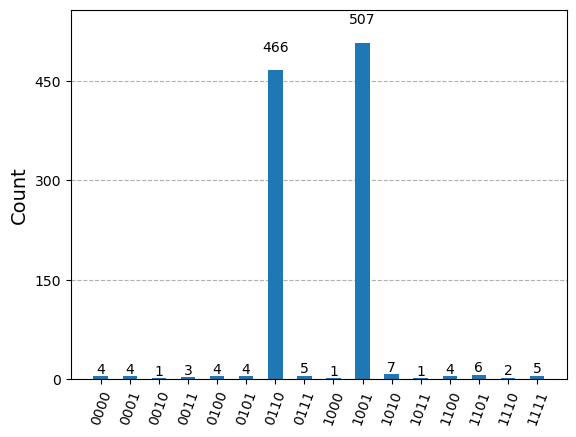

In [39]:
#run it on a simulator
simulator = AerSimulator()
transpiled_qc = transpile(circuit, simulator)
result = simulator.run(transpiled_qc).result()
counts = result.get_counts()
plot_histogram(counts)

As you can see this quantum agorithm correctly identified that 0110 and 1001 are the inputs that work for 2x2 sudoku